In [1]:
# install required dependencies and libraries
import piplite
await piplite.install('seaborn')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# import dataset
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

await download(filepath, "laptops.csv")
file_name="laptops.csv"

# import file to pandas dataframe
df = pd.read_csv(file_name, header=0)

df.head(5) # test

<ipython-input-1-38fb617b771d>:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [6]:
# TASK 1: VISUALISE INDIVIDUAL FEATURE PATTERNS
df.columns

# CPU_frequency
cpu_corr = df[['CPU_frequency', 'Price']].corr()
print('The correlation between CPU frequency and price is:\n' + cpu_corr.to_string())




The correlation between CPU frequency and price is:
               CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000


(0.0, 3974.15)

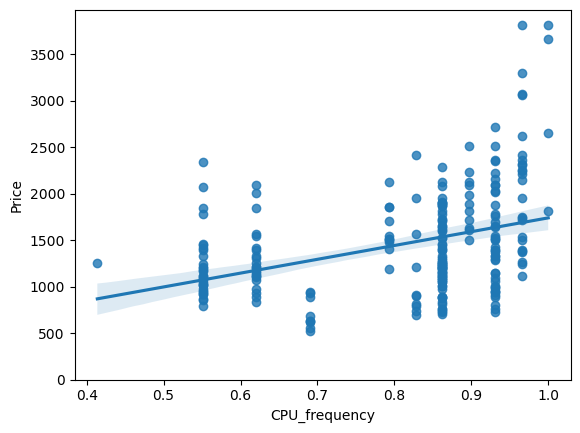

In [8]:
# Scatter plots

#CPU_frequency
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

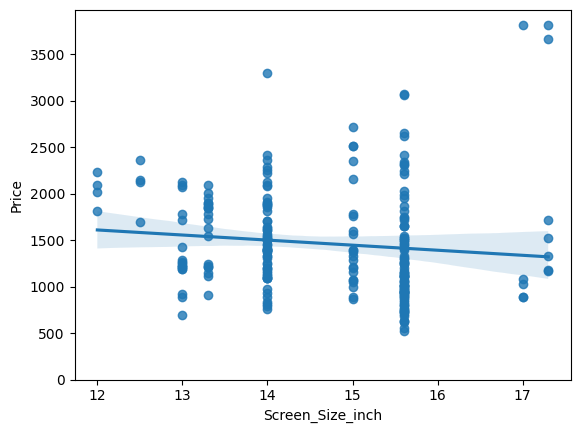

In [9]:
# Screen_Size_inch
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

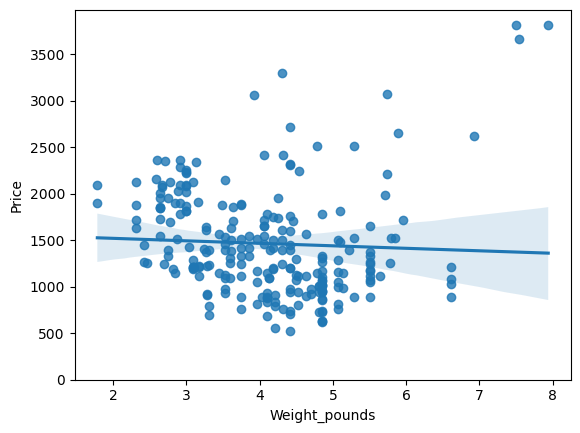

In [10]:
# Weight_pounds
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)

In [13]:
# Correlation values of the three attributes with price
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


<AxesSubplot:xlabel='Category', ylabel='Price'>

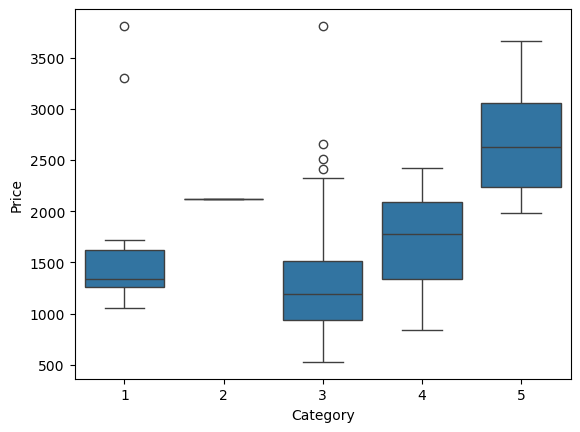

In [17]:
# CATEGORICAL FEATURES (BOX PLOTS)

# category
sns.boxplot(x="Category", y="Price", data=df)


<AxesSubplot:xlabel='GPU', ylabel='Price'>

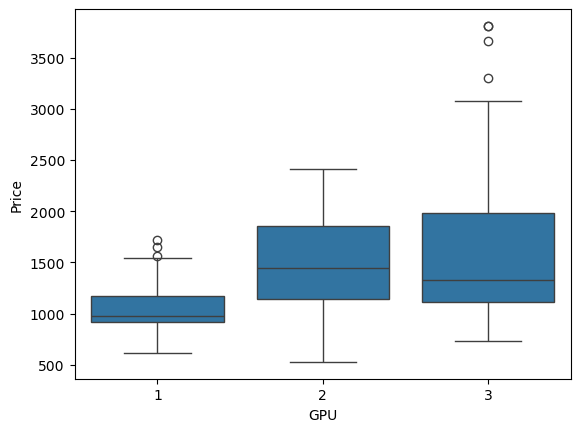

In [18]:
# GPU
sns.boxplot(x="GPU", y="Price", data=df)


<AxesSubplot:xlabel='OS', ylabel='Price'>

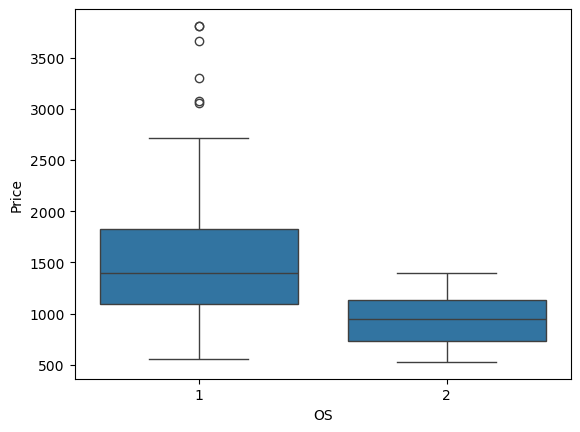

In [19]:
sns.boxplot(x="OS", y="Price", data=df)


<AxesSubplot:xlabel='CPU_core', ylabel='Price'>

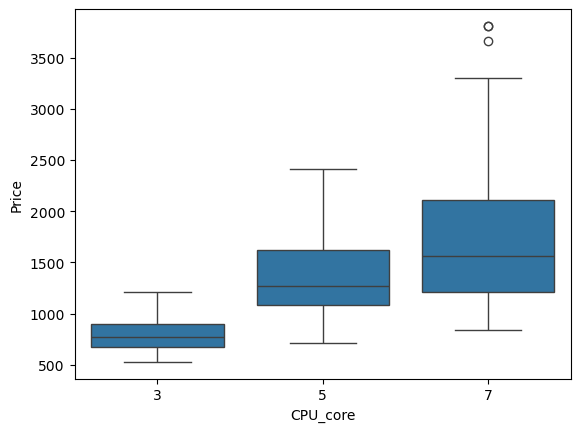

In [20]:
# CPU_core
sns.boxplot(x="CPU_core", y="Price", data=df)


<AxesSubplot:xlabel='RAM_GB', ylabel='Price'>

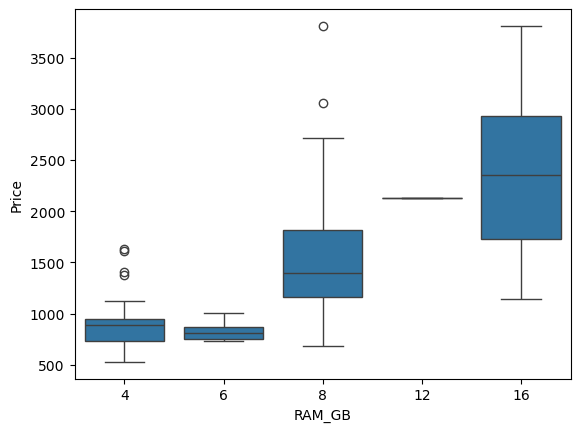

In [21]:
sns.boxplot(x="RAM_GB", y="Price", data=df)


<AxesSubplot:xlabel='Storage_GB_SSD', ylabel='Price'>

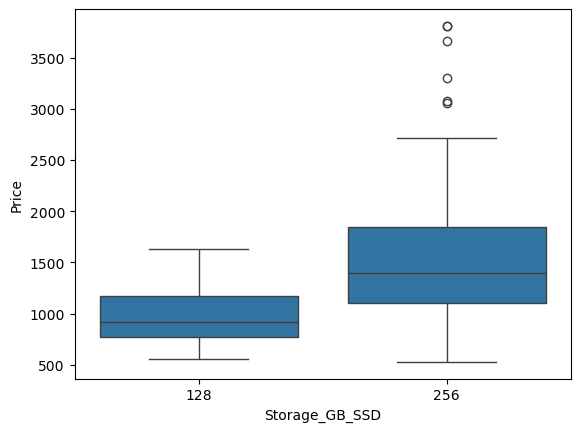

In [22]:
# Storage_GB_SSD
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)


In [24]:
# TASK 2: DESCRIPTIVE STATISTICAL ANALYSIS
print(df.describe(include=['object']))

       Manufacturer Price-binned
count           238          238
unique           11            3
top            Dell          Low
freq             71          160


In [34]:
# TASK 3: GROUPBY AND PIVOT TABLES
# Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.
df_gptest = df[['GPU','CPU_core','Price']]

# grouping results
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)

# visualise the data in a pivot table 
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561
               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


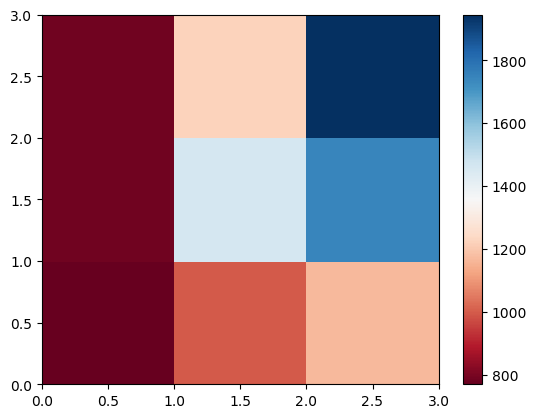

In [35]:
# create P-color plot using group
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

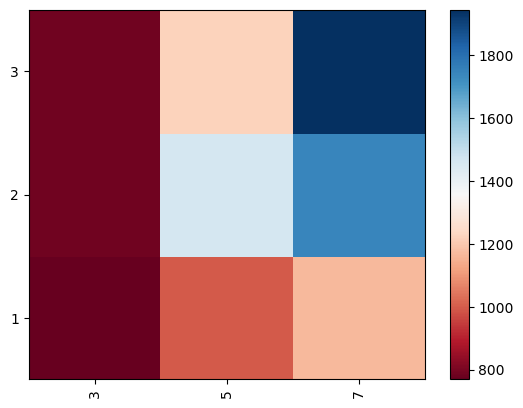

In [36]:
# fix labels
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [39]:
# TASK 4: PEARSON CORRELATION AND P-VALUES
# Use the scipy.stats.pearsonr() function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['GPU'], df['Price'])
print("The Pearson Correlation Coefficient for GPU is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(df['CPU_core'], df['Price'])
print("The Pearson Correlation Coefficient for CPU_core is", pearson_coef, " with a P-value of P =", p_value) 


The Pearson Correlation Coefficient for GPU is 0.2882981988881427  with a P-value of P = 6.166949698364507e-06
The Pearson Correlation Coefficient for CPU_core is 0.45939777733551174  with a P-value of P = 7.912950127008979e-14


In [40]:
# complete for all 
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857849  with a P-value of P = 3.6815606288424503e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.3666655589258861  with a P-value of P = 5.50246335071342e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810297  with a P-value of P = 0.00014898923191724168
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118291  with a P-value of P = 0.08853397846830661
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.050312258377515455  with a P-value of P = 0.4397693853433894
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.45939777733551174  with a P-value of P = 7.912950127008979e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827356  with a P-value of P = 0.0005696642559246817
GPU
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881427  w